*The University of Cape Verde - Faculty of Science and Technologies - Artificial Intelligence for Development (AI4D)*

# Analysis of pests and plagues in Cape Verde

In this notebook we analyse the (TODO: finish the explainment)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metadata = pd.read_csv('../data/pestes e pragas - cabo verde.csv')
metadata.drop('Imagem', axis=1, inplace=True)
metadata.drop([8, 13, 14, 29], axis=0, inplace=True) # Duplicated lines
metadata.head()

,Nome científico,Nome popular,Descrição,Culturas atacadas,Proposta de Controlo
0,phytophthora infestans,Míldio Do Tomate,Nas folhas e no caule são observadas manchas (...,"tomate, batata-comum, beringela, solanáceas","Tratamento Com Euparene (20g / 10l Água), Manc..."
1,alternaria solani,Pinta Preta Do Tomate,Folhas com manchas (cinzento-acastanhadas a es...,tomate,"Tratamento Preventivo No Viveiro, Dois Tratame..."
2,tobacco mosaic virus,Mosaico Comum Do Tomate,"Nas folhas aparecem manchas (amarelas, verde c...",tomate,"Eliminação Das Plantas Infectadas, Por Em Repo..."
3,maize streak virus,Mosaico Estriado Do Milho,As folhas apresentam manchas amarelas alongadas,milho,"Eliminação De Ervas Daninhas Monocotiledónias,..."
4,sclerophthora macrospora,Míldio Do Milho,Listras contínuas pálidas sobre as folhas\nInf...,milho,Eliminação De Plantas Infectadas


In [3]:
metadata[['Nome popular', 'Nome científico', 'Culturas atacadas']]

,Nome popular,Nome científico,Culturas atacadas
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas"
1,Pinta Preta Do Tomate,alternaria solani,tomate
2,Mosaico Comum Do Tomate,tobacco mosaic virus,tomate
3,Mosaico Estriado Do Milho,maize streak virus,milho
4,Míldio Do Milho,sclerophthora macrospora,milho
5,Mosaico Comum Da Mandioca,vírus do mosaico africano da mandioca,mandioca
6,Traça-Da-Couve,plutella xylostella,"couve, repolho, couve-flor"
7,Lagarta-Medidora-Do-Repolho,trichoplusia ni,"couve, repolho, couve-flor, tomate"
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos..."
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe..."


### Analysing the data by the rate of interest of each culture
The rate of interest is defined by weight of each different culture on our country

In [95]:
RATE_OF_INTEREST = {
    'milho': 9,
    'tomate': 7,
    'batata-comum': 4,
    'mandioca': 4,
    'abóbora': 3,
    'cana-de-açúcar': 2,
    'bananeira': 2,
    'diversos': 4,
}

DEFAULT_INTEREST = 1

In [96]:
def interest_rate(culture: str) -> int:
    return RATE_OF_INTEREST[culture] if culture in RATE_OF_INTEREST else DEFAULT_INTEREST

In [97]:
cultures_list = [[c.strip().replace('\n', ' ') for c in cults.split(',')] for cults in list(metadata['Culturas atacadas'])]

rate_of_interests = [sum(interest_rate(culture) for culture in cultures) for cultures in cultures_list]

In [98]:
metadata['Grau de Interesse'] = rate_of_interests

Pests and plagues and they rate of interest in the Cape Verdean Culture

In [99]:
metadata[['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse']]

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas",13
1,Pinta Preta Do Tomate,alternaria solani,tomate,7
2,Mosaico Comum Do Tomate,tobacco mosaic virus,tomate,7
3,Mosaico Estriado Do Milho,maize streak virus,milho,9
4,Míldio Do Milho,sclerophthora macrospora,milho,9
5,Mosaico Comum Da Mandioca,vírus do mosaico africano da mandioca,mandioca,4
6,Traça-Da-Couve,plutella xylostella,"couve, repolho, couve-flor",3
7,Lagarta-Medidora-Do-Repolho,trichoplusia ni,"couve, repolho, couve-flor, tomate",10
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",19


Now sorted by the most interesting ones

In [100]:
interesting_species = metadata[
    ['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse']
].sort_values('Grau de Interesse', ascending=False)

interesting_species.head(10)

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse
21,Lagarta Do Tomate,"helicoverpa armígera, heliothis","tomate, couve, couveflor, repolho, mancarra, a...",27
20,Lagarta De Cartucho Do Milho,spodoptera frugiperda,"cana-de-açúcar, mancarra, citrinos, videira cu...",26
15,Mosca Branca,aleurodicus dispersus,"bananeira, caju, abacateiro, citrinos, goiaba,...",22
37,Mil-Pés De Santo Antão,bandeireinica caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",19
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",19
19,Tartaruginha,nezara viridula,"fruteiras, milho, feijão, batata, tomate",19
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas",13
41,Lagarta do feijão,acherontia atropos,"tomate, batata-comum, feijão",12
39,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela",12
36,Broca Da Cana-De-Açucar E Milho,sesamia nonagrioides,"cana-de-açúcar, milho",11


In [101]:
def plot_bar(X, Y):
    assert len(X) == len(Y), 'They should be equal'
    fig, ax = plt.subplots()

    ax.bar(X, Y)

    plt.xticks(rotation='vertical')
    plt.show()

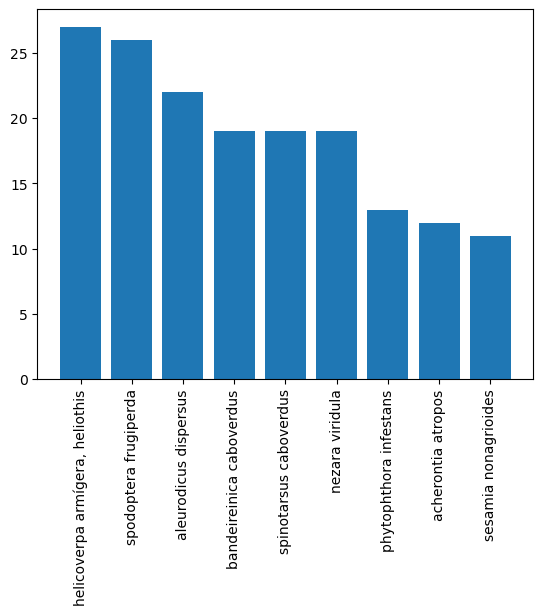

In [102]:
data = interesting_species.head(10)

scientific_names = list(data['Nome científico'])
interest_rates = list(data['Grau de Interesse'])

plot_bar(scientific_names, interest_rates)

In [103]:
cultures_per_plagues = [sum(1 if c != 'diversos' else 5 for c in cultures) for cultures in cultures_list]

In [104]:
metadata['Culturas por Pragas'] = cultures_per_plagues
metadata[['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse', 'Culturas por Pragas']]

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse,Culturas por Pragas
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas",13,4
1,Pinta Preta Do Tomate,alternaria solani,tomate,7,1
2,Mosaico Comum Do Tomate,tobacco mosaic virus,tomate,7,1
3,Mosaico Estriado Do Milho,maize streak virus,milho,9,1
4,Míldio Do Milho,sclerophthora macrospora,milho,9,1
5,Mosaico Comum Da Mandioca,vírus do mosaico africano da mandioca,mandioca,4,1
6,Traça-Da-Couve,plutella xylostella,"couve, repolho, couve-flor",3,3
7,Lagarta-Medidora-Do-Repolho,trichoplusia ni,"couve, repolho, couve-flor, tomate",10,4
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5,5
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",19,5


In [105]:
ranked_by_cultures_per_plagues = metadata[
    ['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse', 'Culturas por Pragas']
].sort_values('Culturas por Pragas', ascending=False)

ranked_by_cultures_per_plagues.head(10)

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse,Culturas por Pragas
15,Mosca Branca,aleurodicus dispersus,"bananeira, caju, abacateiro, citrinos, goiaba,...",22,15
20,Lagarta De Cartucho Do Milho,spodoptera frugiperda,"cana-de-açúcar, mancarra, citrinos, videira cu...",26,14
21,Lagarta Do Tomate,"helicoverpa armígera, heliothis","tomate, couve, couveflor, repolho, mancarra, a...",27,10
35,Ácaro Vermelho,tetranychus cinnabarinus,"mandioca, papaieira, abóbora, abobrinha, moran...",11,6
30,Mosca De Abóbora,dacus frontalis,"abobora, abobrinha, melão, melancia, pimento, ...",6,6
22,Lagarta Do Tomate,tuta absoluta,"solanáceas, tomate, beringela, batata, pimentão",11,5
19,Tartaruginha,nezara viridula,"fruteiras, milho, feijão, batata, tomate",19,5
37,Mil-Pés De Santo Antão,bandeireinica caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",19,5
31,Mosquinha Branca,bemisia tabaci,diversos,4,5
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5,5


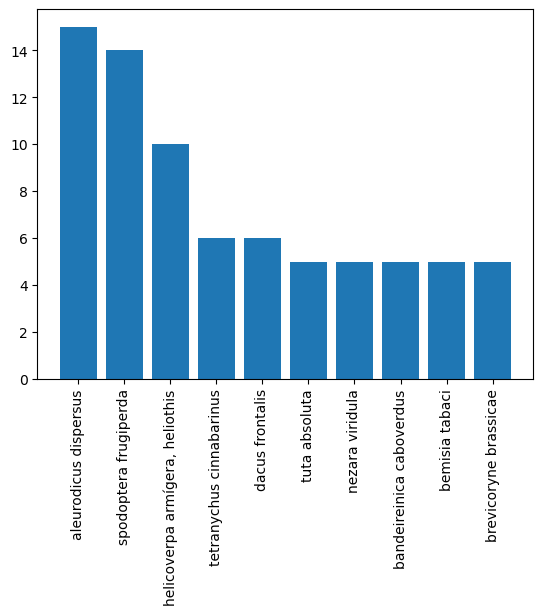

In [106]:
data = ranked_by_cultures_per_plagues.head(10).copy()

scientific_names = list(data['Nome científico'])
cults_per_plagues = list(data['Culturas por Pragas'])

plot_bar(scientific_names, cults_per_plagues)

In [107]:
interest_rates = list(data['Grau de Interesse'])
squared_sum_interest_rate = [(i ** 2 + n ** 2)**0.5 for (i, n) in list(zip(interest_rates, cults_per_plagues))]
squared_sum_interest_rate

[26.627053911388696,
 29.5296461204668,
 28.792360097775937,
 12.529964086141668,
 8.48528137423857,
 12.083045973594572,
 19.6468827043885,
 19.6468827043885,
 6.4031242374328485,
 7.0710678118654755]

In [108]:
data = ranked_by_cultures_per_plagues.head(10).copy()
data['Soma quadrada de interesses'] = squared_sum_interest_rate

In [109]:
data.sort_values('Soma quadrada de interesses', ascending=False, inplace=True)
data.head(10)

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse,Culturas por Pragas,Soma quadrada de interesses
20,Lagarta De Cartucho Do Milho,spodoptera frugiperda,"cana-de-açúcar, mancarra, citrinos, videira cu...",26,14,29.529646
21,Lagarta Do Tomate,"helicoverpa armígera, heliothis","tomate, couve, couveflor, repolho, mancarra, a...",27,10,28.792360
15,Mosca Branca,aleurodicus dispersus,"bananeira, caju, abacateiro, citrinos, goiaba,...",22,15,26.627054
19,Tartaruginha,nezara viridula,"fruteiras, milho, feijão, batata, tomate",19,5,19.646883
37,Mil-Pés De Santo Antão,bandeireinica caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",19,5,19.646883
35,Ácaro Vermelho,tetranychus cinnabarinus,"mandioca, papaieira, abóbora, abobrinha, moran...",11,6,12.529964
22,Lagarta Do Tomate,tuta absoluta,"solanáceas, tomate, beringela, batata, pimentão",11,5,12.083046
30,Mosca De Abóbora,dacus frontalis,"abobora, abobrinha, melão, melancia, pimento, ...",6,6,8.485281
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5,5,7.071068
31,Mosquinha Branca,bemisia tabaci,diversos,4,5,6.403124


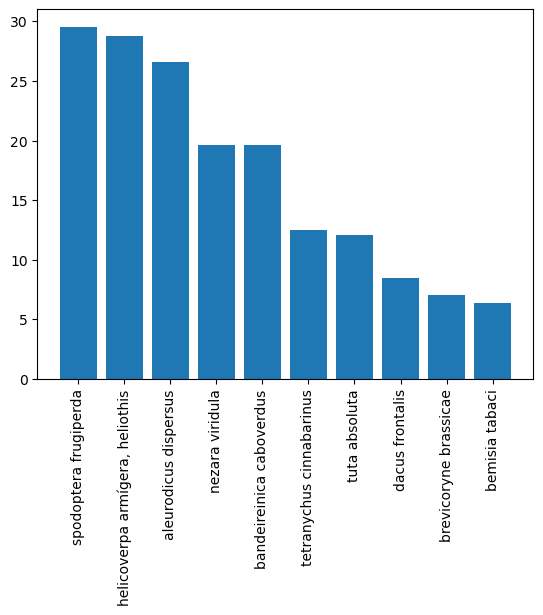

In [110]:
plot_bar(list(data['Nome científico']), list(data['Soma quadrada de interesses']))

In [111]:
print(list(data['Nome científico']))

['spodoptera frugiperda', 'helicoverpa armígera, heliothis', 'aleurodicus dispersus', 'nezara viridula', 'bandeireinica caboverdus', 'tetranychus cinnabarinus', 'tuta absoluta', 'dacus frontalis', 'brevicoryne brassicae', 'bemisia tabaci']
